# Data Analysis over Students Performance dataset using PostgreSQL

Name: Maria Jose


## Objective
The project involves analyzing data using PostgreSQL, psycopg2, and JupyterLab. It includes working with an existing dataset, performing analytical operations, integrating these with Python, and presenting insights or recommendations based on the findings.

## 1. Dataset: Students Performance
The Students Performance Dataset, from Kaggle, provides data on students' academic performance in relation to various demographic and socioeconomic factors. The dataset is already pre-cleaned, making it suitable for analysis, especially for exploring correlations and patterns in education-related data.


Link: https://www.kaggle.com/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned

**Features included in the Dataset:**
* Gender: Analyzes performance differences between male and female students.
* Race/Ethnicity: Explores academic trends across different racial or ethnic groups.
* Parental Level of Education: Indicates the educational background of the student's family.
* Lunch: Identifies whether students receive free or reduced lunch, often linked to socioeconomic status.
* Test Preparation Course: Shows whether students completed a test prep course, potentially affecting their performance.
* Math Score: Represents students' math performance, useful for calculating averages and trends.
* Reading Score: Measures reading proficiency, providing insights into literacy levels.
* Writing Score: Assesses writing skills, reflecting literacy and expressive abilities.
* Total Score
* Average Score

## 2. Prepare the Database

#### Import the Database to PostgreSQL

![Import data](import_data.png)

The dataset was copied to students table. This is a single table with 10 columns.

![verify](1.verify.png)

Then I added a column named students id for analisys:
![id](2.add_id.png)

Then I changed the gender values to male or female for analisys:
![gender](3.gender_change.png)

Then, I rounded the average column to better number visualization:
![round](4.round_avg.png)

The dataset was already pre-cleaned, so, if looking for anomalies in data, like 0 scores, it was only found one record with only 1 subject as 0, so it was accepted.

![No anomalies](data_cleaned.png)

## 3. Write SQL Queries:

First, I started with an overview analysis.
![over](sql_over.png)

Then, the overview by gender.
![over](sql_over_gender.png)

Then, the overview by ethnicity.
![over](sql_over_etn.png)

And also, some other complex queries with the lunch and test preparation fields.
![over](sql_over_lunch_test.png)

## 4. Python Integration:

In [1]:
# Import the libraries
import psycopg2
import pandas as pd

In [3]:
# Connect to the postgres DB
conn = psycopg2.connect(
dbname="final_project",
user="postgres",
password="1234",
host="localhost",
port="5432"
)

In [5]:
# Open a cursor to perform database operations
cur = conn.cursor()

### Testing SQL queries

#### *Basic Overview*

In [9]:
# Basic Overview
cur.execute("""
SELECT 
	COUNT(*) AS total_students, 
	ROUND(AVG(math_score),2) AS avg_math_score, 
	ROUND(AVG(reading_score),2) AS avg_reading_score,
	ROUND(AVG(writing_score),2) AS avg_writing_score,
	ROUND(AVG(average_score)::NUMERIC, 2) AS avg_score --Casts the result of AVG(average_score) into the NUMERIC data
FROM students
""")
over = cur.fetchall()

# Print all rows
print("Class Performance Summary:")
for row in over:
    print(f"Total students: {row[0]}")
    print(f"AVG(math_score): {row[1]:.2f}")
    print(f"AVG(reading_score): {row[2]:.2f}")
    print(f"AVG(writing_score): {row[3]:.2f}")
    print(f"AVG(score): {row[4]:.2f}")

Class Performance Summary:
Total students: 1000
AVG(math_score): 66.09
AVG(reading_score): 69.17
AVG(writing_score): 68.05
AVG(score): 67.77


#### *Overview by parental education*

In [13]:
# Overview by parental education:
cur.execute("""
SELECT 
	parental_level_of_education AS parents_education,
	COUNT(*) AS total_students,
	ROUND(AVG(average_score)::NUMERIC, 2) AS avg_score --Casts the result of AVG(average_score) into the NUMERIC data
FROM students
GROUP BY parental_level_of_education
ORDER BY 
	CASE 
	    WHEN parental_level_of_education LIKE 'master%' THEN 1 
	    WHEN parental_level_of_education LIKE 'bachelor%' THEN 2
	    WHEN parental_level_of_education LIKE 'associate%' THEN 3
	    WHEN parental_level_of_education = 'some college' THEN 4
	    WHEN parental_level_of_education = 'high school' THEN 5
		WHEN parental_level_of_education = 'some high school' THEN 6
	END
""")
over_parents = cur.fetchall()

# Create DataFrame
over_parents_df = pd.DataFrame(over_parents, columns=["Degree", "Student Count", "Average Score"])

# Print the DataFrame
print(over_parents_df)

               Degree  Student Count Average Score
0     master's degree             59         73.60
1   bachelor's degree            118         71.92
2  associate's degree            222         69.57
3        some college            226         68.48
4         high school            196         63.10
5    some high school            179         65.11


#### *Overview by taking the test_preparation_course and receiving lunch help*

In [16]:
# Overview by taking the test_preparation_course and receiving lunch help:
cur.execute("""
SELECT 
	test_preparation_course,
	lunch,
	COUNT(student_id) AS count_students, 
	ROUND(AVG(math_score),2) AS avg_math_score, 
	ROUND(AVG(reading_score),2) AS avg_reading_score,
	ROUND(AVG(writing_score),2) AS avg_writing_score,
	ROUND(AVG(average_score)::NUMERIC, 2) AS avg_score --Casts the result of AVG(average_score) into the NUMERIC data
FROM students
GROUP BY test_preparation_course, lunch
ORDER BY test_preparation_course, lunch
""")
over_lunch_test = cur.fetchall()

# Print all rows with formatted output
headers = ['Preparation Course', 'Help for Lunch', '# Students', 'Avg Math', 'Avg Reading', 'Avg Writing', 'Avg Score']

# Print header row
print(f"{headers[0]:<20} {headers[1]:<15} {headers[2]:<15} {headers[3]:<15} {headers[4]:<15} {headers[5]:<15} {headers[6]:<15}")

# Print each row
for row in over_lunch_test:
    print(f"{row[0]:<20} {row[1]:<15} {row[2]:<15} {row[3]:<15} {row[4]:<15} {row[5]:<15} {row[6]:<15}")

Preparation Course   Help for Lunch  # Students      Avg Math        Avg Reading     Avg Writing     Avg Score      
0                    0               224             56.51           61.60           58.74           58.95          
0                    1               418             68.13           69.18           67.60           68.30          
1                    0               131             63.05           69.87           70.35           67.76          
1                    1               227             73.53           76.22           76.77           75.51          


### Data Visualization

In [18]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

#### *Histogram from the average score of each subject*

In [20]:
# Get the Score Distribution from SQL:
cur.execute("""
SELECT 
	math_score,
	COUNT(*) AS student_count
FROM students
GROUP BY math_score
ORDER BY math_score
""")
score_math = cur.fetchall()

cur.execute("""
SELECT 
	reading_score,
	COUNT(*) AS student_count
FROM students
GROUP BY reading_score
ORDER BY reading_score
""")
score_reading = cur.fetchall()

cur.execute("""
SELECT 
	writing_score,
	COUNT(*) AS student_count
FROM students
GROUP BY writing_score
ORDER BY writing_score
""")
score_writing = cur.fetchall()

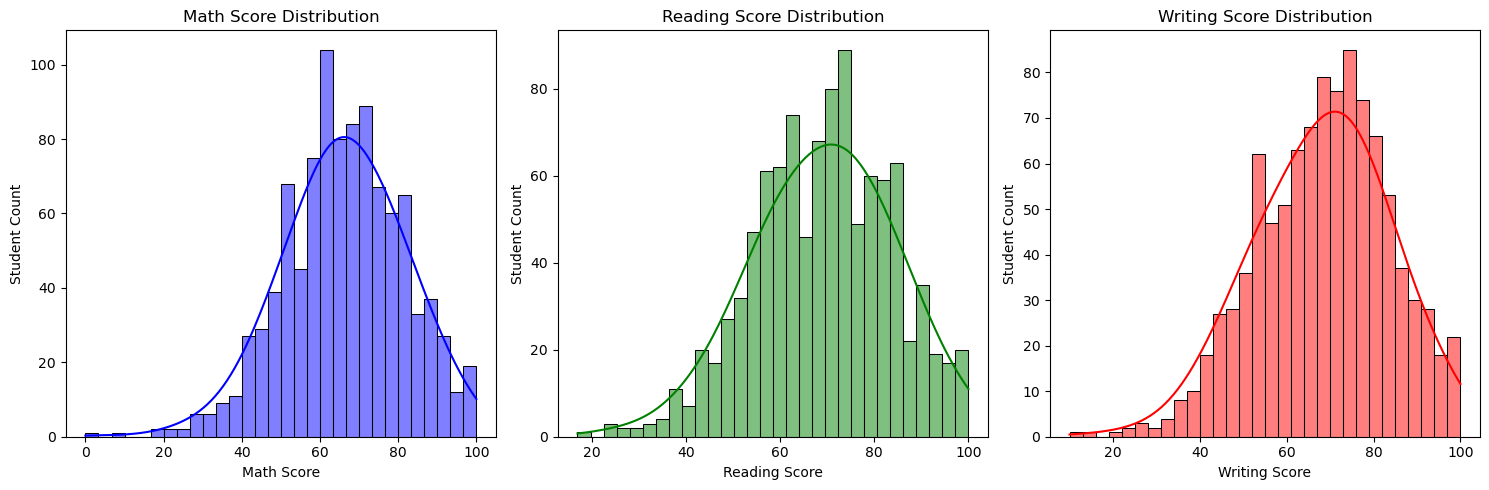

In [22]:
# Convert query results to DataFrames
df_math = pd.DataFrame(score_math, columns=['score', 'count'])
df_reading = pd.DataFrame(score_reading, columns=['score', 'count'])
df_writing = pd.DataFrame(score_writing, columns=['score', 'count'])

# Create a figure and subplots
plt.figure(figsize=(15, 5))

# Math Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_math, x='score', weights='count', bins=30, color='blue', kde=True)
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Student Count')

# Reading Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_reading, x='score', weights='count', bins=30, color='green', kde=True)
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Student Count')

# Writing Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df_writing, x='score', weights='count', bins=30, color='red', kde=True)
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Student Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### *Plot the students average score by the relation with the parental education level*

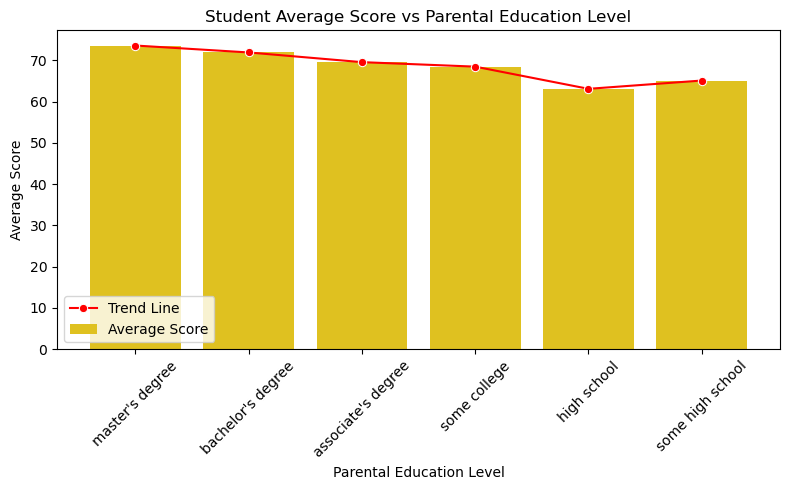

In [59]:
# given above the dataframe: over_parents_df

# Bar Plot for Average Score
plt.figure(figsize=(8, 5))

sns.barplot(data=over_parents_df, x='Degree', y='Average Score', color='gold', label='Average Score')
sns.lineplot(data=over_parents_df, x='Degree', y='Average Score', color='red', marker='o', label='Trend Line')

plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.title('Student Average Score vs Parental Education Level')
plt.tight_layout()
plt.show()

#### *Plot Pass or Fail + taking the test_preparation_course and receiving lunch help*

In [61]:
# Failed/Passed + taking the test_preparation_course and receiving lunch help:
cur.execute("""
SELECT 
	SUM(test_preparation_course) AS test_preparation,
	SUM(lunch) AS help_lunch,
	COUNT(student_id) AS count_students, 
	ROUND(AVG(average_score)::NUMERIC, 2) AS avg_score
FROM students
WHERE math_score < 60 OR reading_score < 50 OR writing_score < 50
""")
failed = cur.fetchall()

cur.execute("""
SELECT 
	SUM(test_preparation_course) AS test_preparation,
	SUM(lunch) AS help_lunch,
	COUNT(student_id) AS count_students, 
	ROUND(AVG(average_score)::NUMERIC, 2) AS avg_score
FROM students
WHERE math_score > 60 AND reading_score > 50 AND writing_score > 50
""")
passed = cur.fetchall()

In [63]:
fail_df = pd.DataFrame(failed, columns=["test_preparation", "help_lunch", "count_students", "avg_score"])
pass_df = pd.DataFrame(passed, columns=["test_preparation", "help_lunch", "count_students", "avg_score"])

# Add a status to dataframe
fail_df["category"] = "Failing"
pass_df["category"] = "Passing"

pass_fail_df = pd.concat([fail_df, pass_df], ignore_index=True)

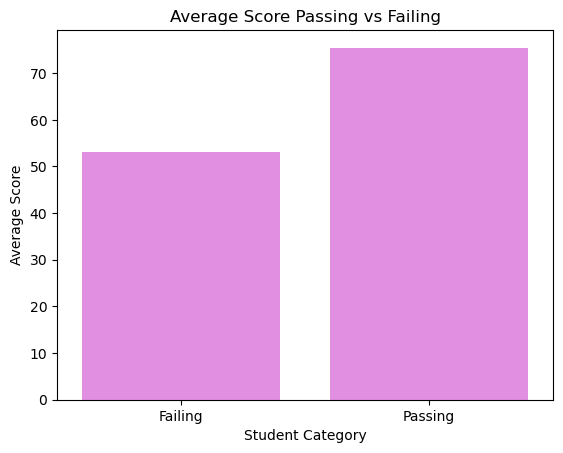

In [65]:
# plot number of students passed vs failed
sns.barplot(x="category", y="avg_score", color='violet', data=pass_fail_df)
plt.title("Average Score Passing vs Failing")
plt.xlabel("Student Category")
plt.ylabel("Average Score")
plt.show()

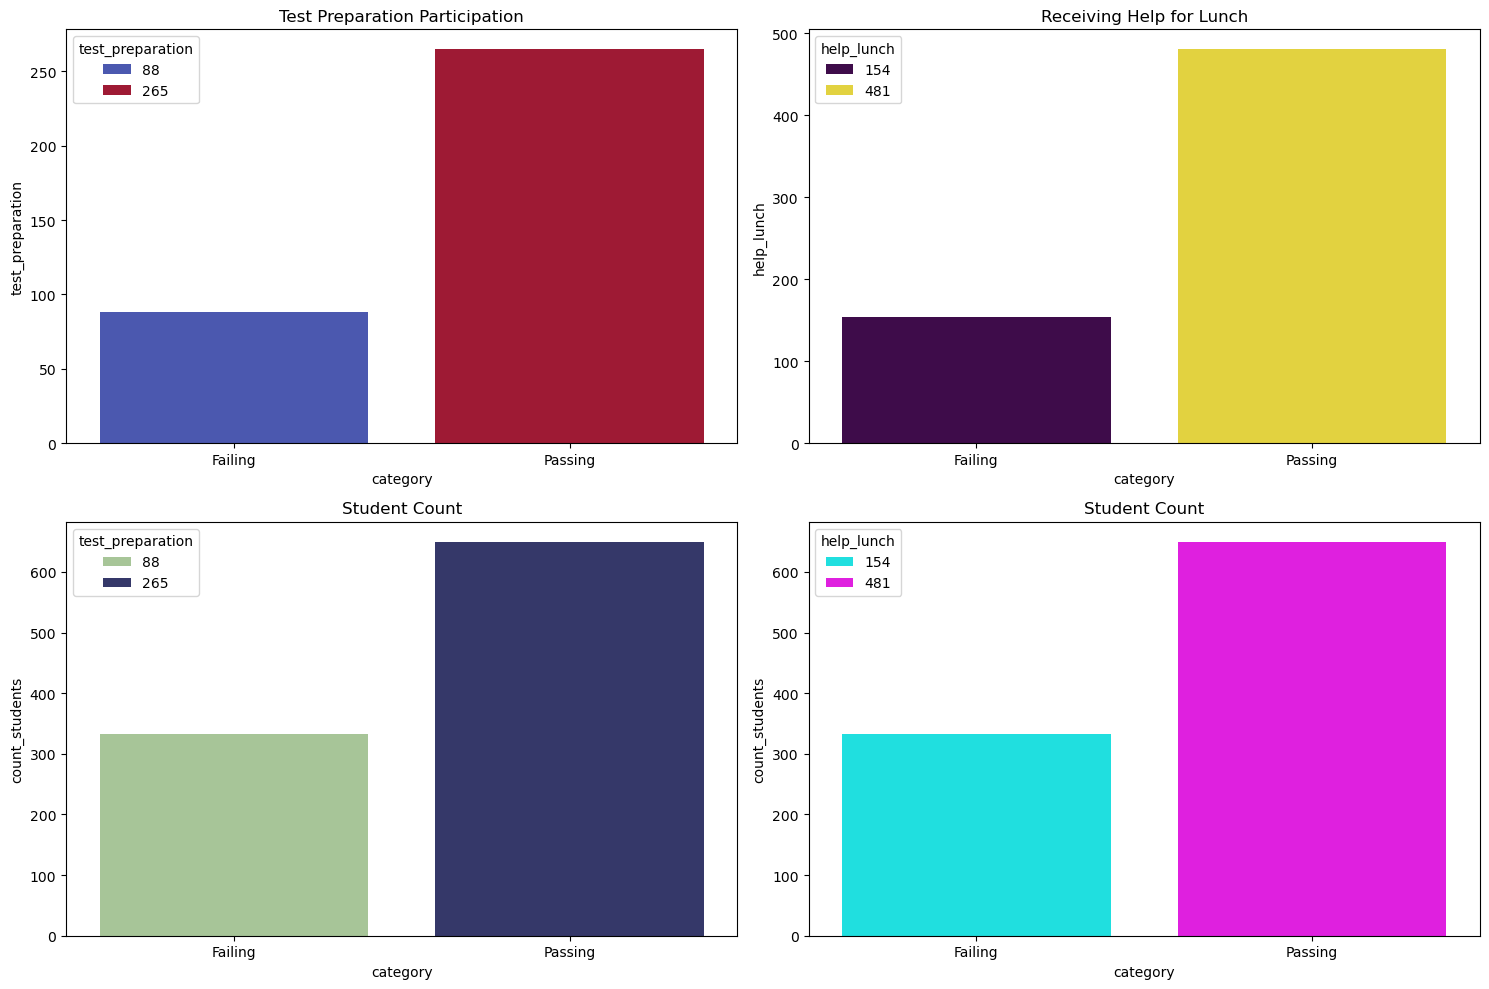

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x="category", y="test_preparation", data=pass_fail_df, palette="coolwarm", ax=axes[0][0], hue="test_preparation")
axes[0][0].set_title("Test Preparation Participation")
sns.barplot(x="category", y="help_lunch", data=pass_fail_df, palette="viridis", ax=axes[0][1], hue="help_lunch")
axes[0][1].set_title("Receiving Help for Lunch")
sns.barplot(x="category", y="count_students", data=pass_fail_df, palette="crest", ax=axes[1][0], hue="test_preparation")
axes[1][0].set_title("Student Count")
sns.barplot(x="category", y="count_students", data=pass_fail_df, palette='cool', ax=axes[1][1], hue="help_lunch")
axes[1][1].set_title("Student Count")

plt.tight_layout()
plt.show()

In [75]:
# Close communication with the database
cur.close()
conn.close()

#### *Insights*

* The average score across all subjects is 67.77, with math being the lowest (66.09) and reading the highest (69.17).
* Parental Education Level: Students with parents who have higher education levels (e.g., a master’s or bachelor’s degree) tend to score higher, while those with parents having high school or less education achieve lower scores.
* Completing a test preparation course significantly boosts scores across all subjects.
* Students receiving lunch assistance show better performance compared to those without assistance, suggesting that socioeconomic factors impact academic success.
* Students who participated in test preparation programs were more likely to pass compared to those who did not.
* Students in the "Passing" category scored significantly higher on average than those in the "Failing" category. A clear difference in performance exists between the two groups.
* There are significantly more students in the "Passing" category than in the "Failing" category across different factors (test preparation, lunch help).

This data highlights the influence of parental education, preparation, and socioeconomic support on student outcomes.